In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

Link on how to work with Pandas Dataframes (selecting rows based on column entries) : https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

WHO Source Data: https://ourworldindata.org/coronavirus-source-data

In [3]:
# Dataframe Preparation
df = pd.read_csv('owid-covid-data.csv')
df = df.fillna(0)
df1 = pd.read_csv('world_pop.csv')
df_pop = df1[['Country','Year_2015']]
total_countries = [str(i) for i in np.unique(df['location'].to_numpy())]

##### This notebook gives a way to retrieve COVID-19 data from a csv filed obtained from WHO source data (given above). The analysis revolves around countries. That is data is retrieved for individual countries such that intra-national and international comparisons can be made. Line plots and bar graphs can be generated, where appropriate. The functions below provide simple data retrieval and analytical building blocks for more complex analysis.

In [5]:
def country_data_frame(country_list, df):
    
    ''' Takes a list of countries stored as strings, and returns the data frame for that country '''
    
    return [df.loc[df['location'] == i] for i in country_list]

def get_data(country_list, category, df):
    
    ''' Takes the data frame of a country, and returns the desired category of the data frame. 
    Mutltiple countries can be selected. Data is stored as a dictionary.
    
    Category must be a string.
    
    '''
    df_country = country_data_frame(country_list, df)
    category_list = [i[category].to_numpy() for i in df_country]
    return dict(zip(country_list, category_list))

def daily_difference(data, days, country):
    '''Given a country, temporal data (daily) and number of days this function computes the daily differences.'''
    
    return np.diff((data[country][-days:]))

In [19]:
def gen_plots_line(country_list, category, title, y_label, df):
    
    dat_dictionary = get_data(country_list, category, df)
    for num, i in enumerate(dat_dictionary.values()):
        figure(num=1, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
        x = np.array([j for j in range(len(i))])
        plt.plot(x, i, label = country_list[num])
        plt.xlabel('Number of Days')
        plt.ylabel(y_label)
        plt.title(title)
        plt.legend(shadow = True)
    return dat_dictionary

In [10]:
def gen_plots_bar_per_case(country_list, category, title, y_label, dat, df):
    
    dat_dictionary = get_data(country_list, category, df)
    dat_cases = get_data(country_list, 'total_cases',df)
    y_vals = []
    cases = []
    for i in dat_dictionary.values():
        y_vals.append(i[-1])
    for j in dat_cases.values():
        cases.append(j[-1])
    plot_quantity = (np.array(y_vals)/np.array(cases))*100 
    figure(num=2, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.xticks(rotation = 'vertical')
    plt.ylabel(y_label)
    plt.title(title)
    plt.bar(dat_dictionary.keys(), plot_quantity, 0.2, color = 'b')
    plt.show()
    if dat == True:
        return dat_dictionary, dict(zip(country_list, plot_quantity))

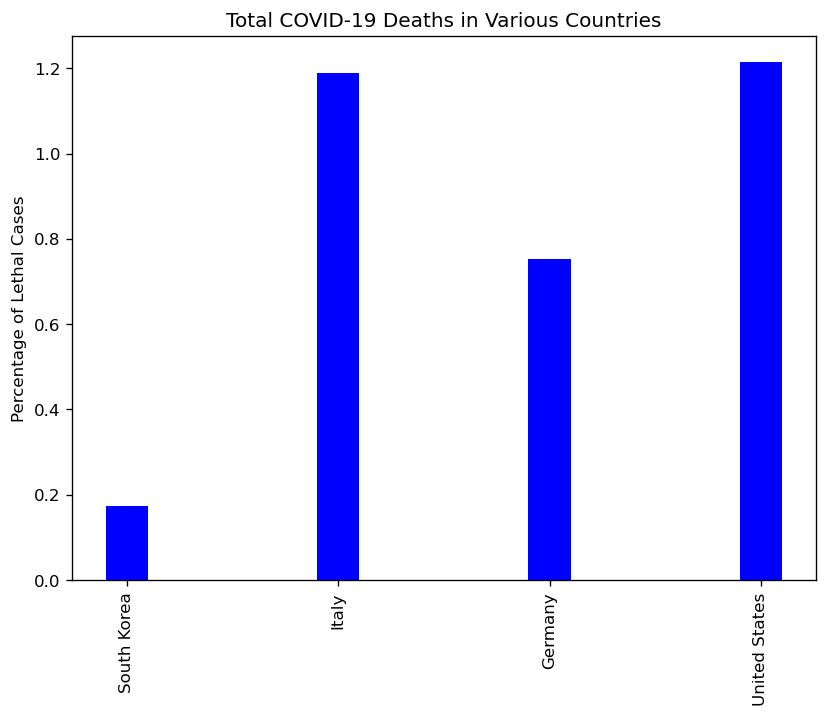

In [12]:
gen_plots_bar_per_case(['South Korea', 'Italy', 'Germany', 'United States'], 'total_deaths', 
                       'Total COVID-19 Deaths in Various Countries', 'Percentage of Lethal Cases', True, df)
plt.show()

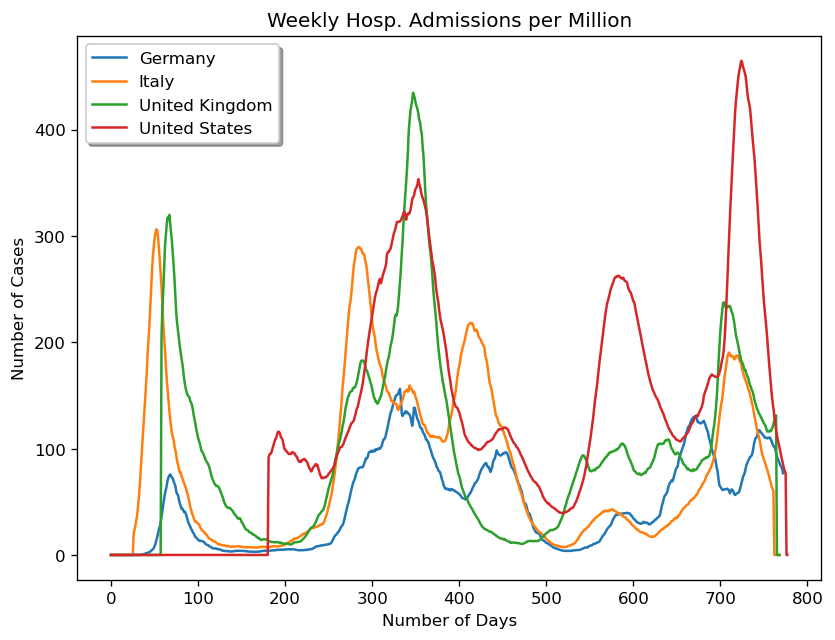

In [21]:
dict_1 = gen_plots_line(['Germany', 'Italy', 'United Kingdom', 'United States'],  'weekly_hosp_admissions_per_million', 
               'Weekly Hosp. Admissions per Million', 'Number of Cases', df)